### Imports

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from math import ceil
from Ambrosia import pre_process_image
from skimage import io

In [2]:
# get path of image to ingest
wd = os.getcwd()
# image_name = "IMG_0269_clean.JPG"
# image_name = "IMG_0011.JPG"
image_name = "IMG_0014.JPG"
wd_image_path =  wd+"/"+ image_name
image_path = wd_image_path

# Initialize compound image

In [3]:
# Initialize image
ppi = pre_process_image(image_dir = image_path)

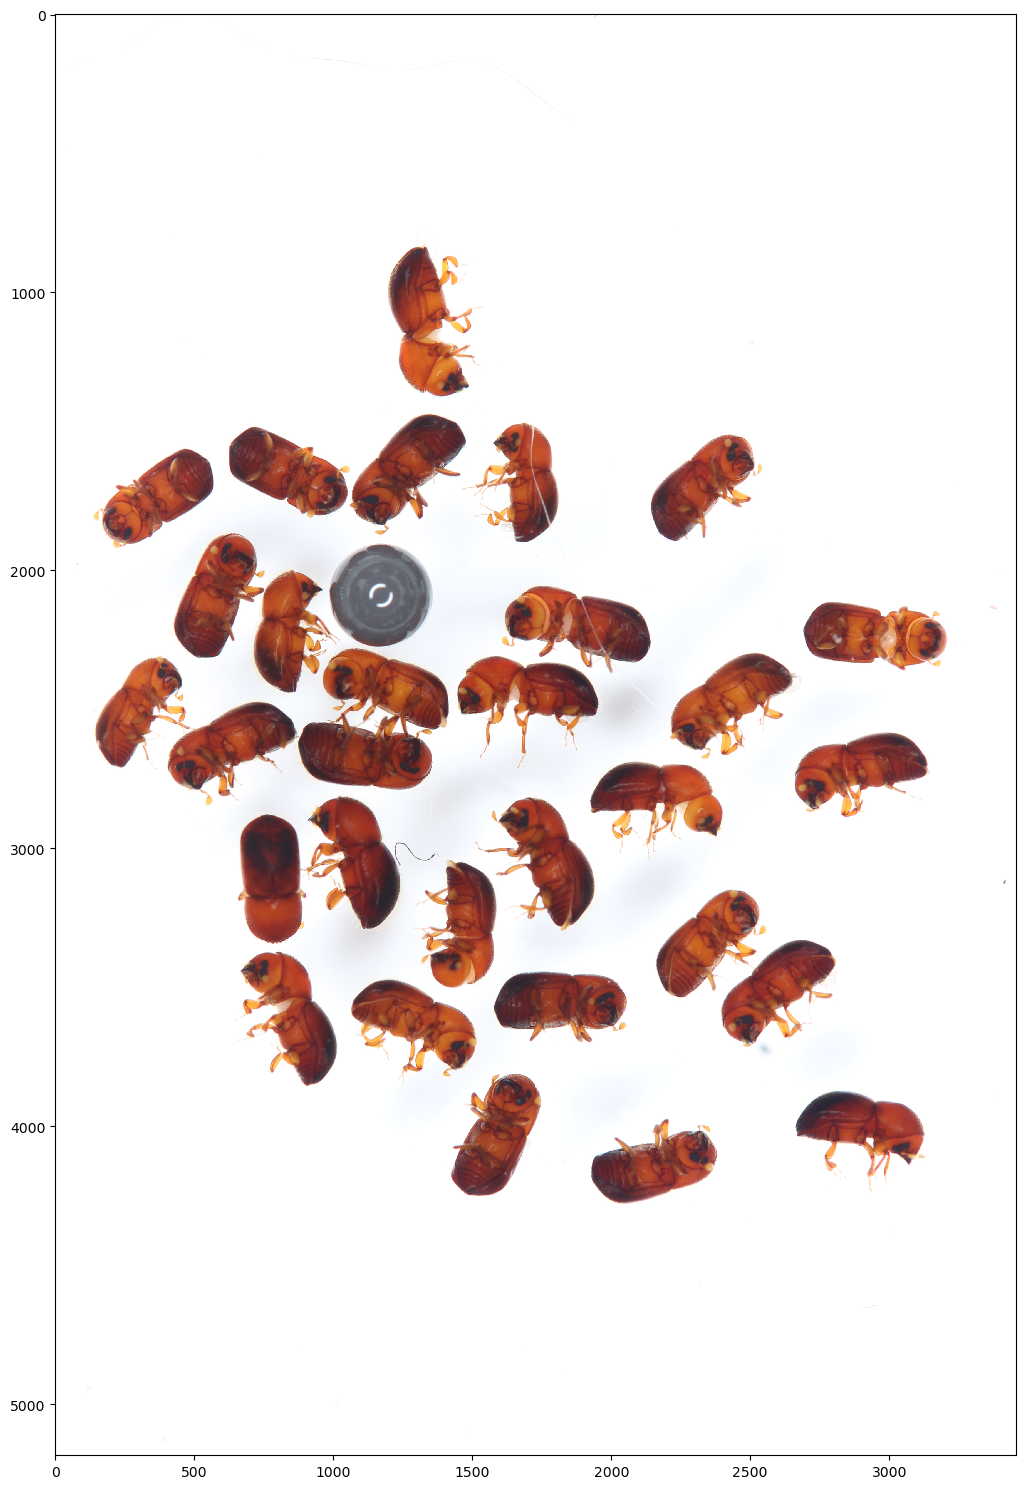

In [4]:
# input image
plt.figure(figsize=(15, 15))
io.imshow(ppi.image)
plt.show()

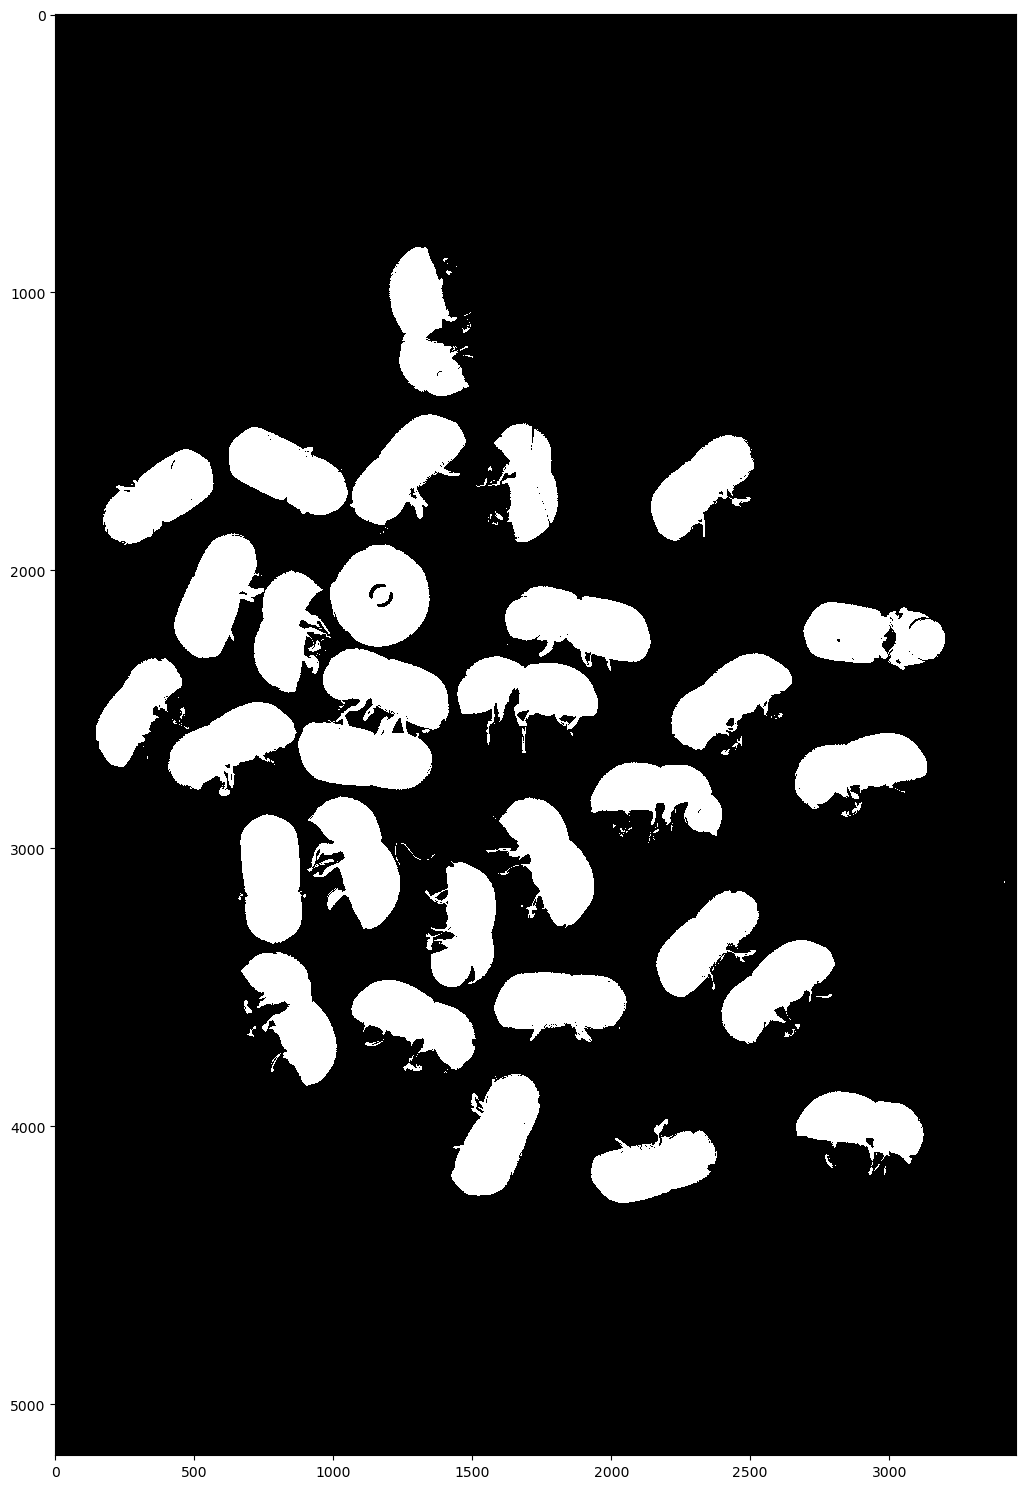

In [5]:
# input image
plt.figure(figsize=(15, 15))
io.imshow(ppi.inv_bw_image)
plt.show()

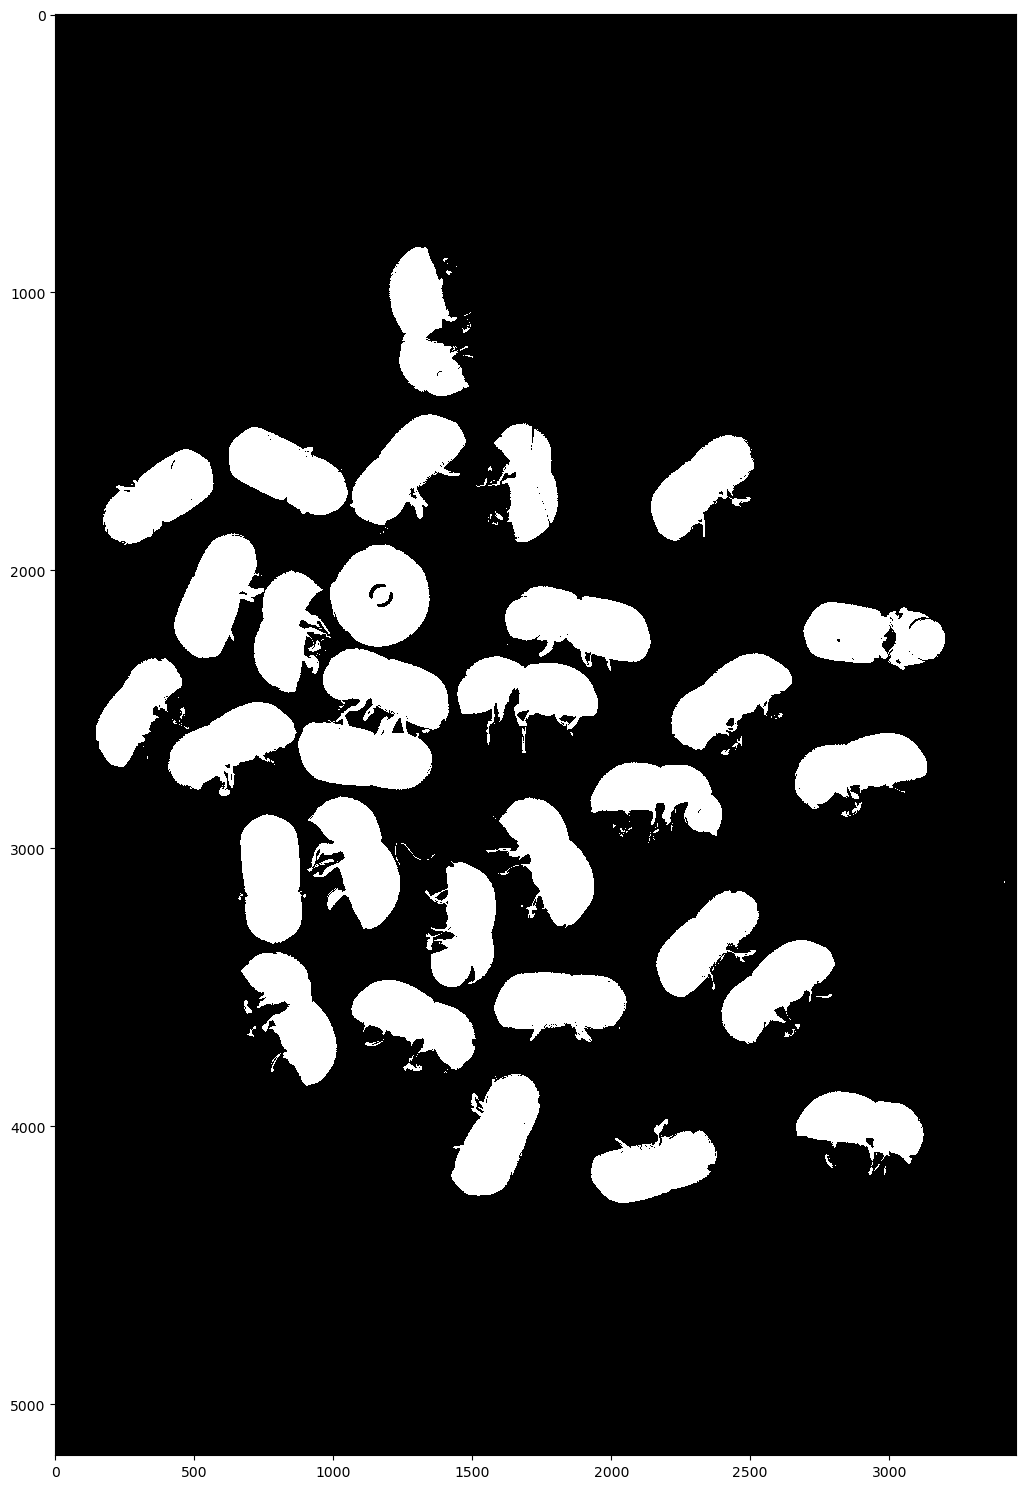

In [6]:
# input image
plt.figure(figsize=(15, 15))
io.imshow(ppi.clear_inv_bw_image)
plt.show()

# Segment compound image into smaller images

In [7]:
# apply segmentation of blobs in image
ppi.segment(cluster_num=2, image_edge_buffer=50)

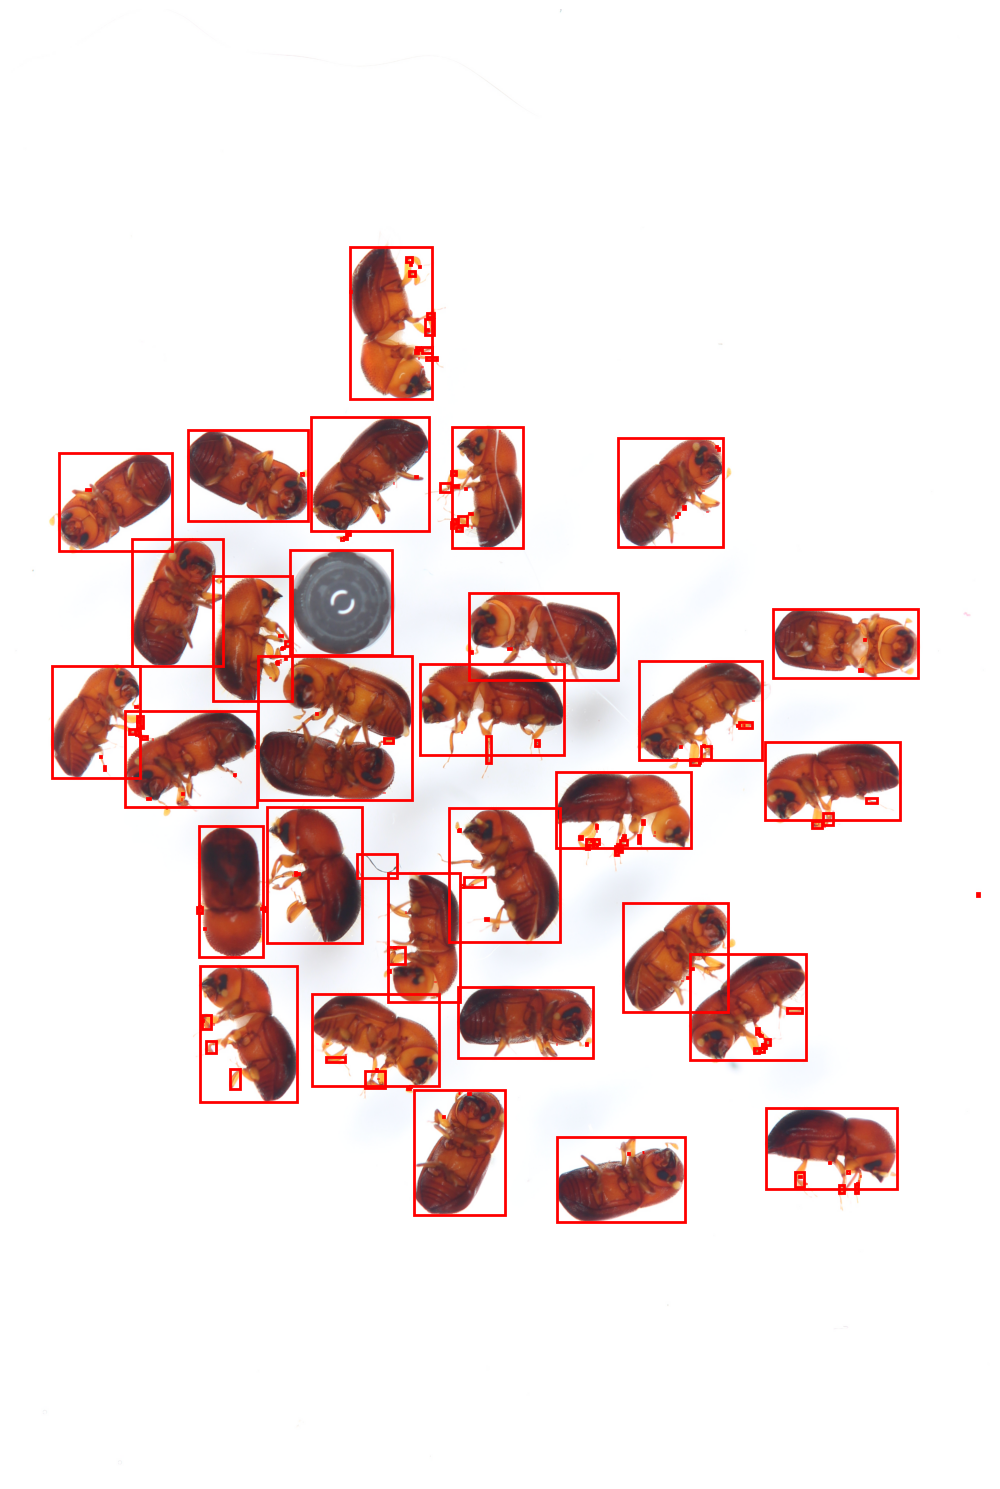

In [8]:
# plot boxes that will be used to extract 
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(ppi.image)
coord_df = ppi.image_properties_df
for i in range(len(coord_df)):
    data_i = coord_df.iloc[i]
    minr = data_i['bbox-0']
    minc = data_i['bbox-1']
    maxr = data_i['bbox-2']
    maxc =data_i['bbox-3']
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [9]:
# all artefacts dataframe
ppi.image_properties_df

centroid-0   centroid-1  bbox-0  bbox-1  bbox-2  bbox-3  orientation  \
0    1120.752660  1324.193304     838    1200    1376    1489     0.204718   
1     882.397436  1403.179487     875    1395     893    1417    -1.056007   
2     887.666667  1405.666667     887    1405     889    1407     0.785398   
3     897.928571  1411.500000     894    1410     904    1414     0.352545   
4     908.100000  1443.900000     907    1442     910    1447     1.436613   
..           ...          ...     ...     ...     ...     ...          ...   
269  4141.333333  2987.666667    4141    2987    4143    2989    -0.785398   
270  4161.156250  2984.287500    4144    2981    4176    2990    -0.114692   
271  4145.500000  2935.000000    4145    2935    4147    2936     0.000000   
272  4162.841912  2933.102941    4148    2923    4176    2941    -0.321910   
273  4191.000000  2329.000000    4191    2329    4192    2330     0.785398   

     axis_major_length  axis_minor_length   area  area_filled  kmeans_label  
0           595.526855         212.373456  87960        88145             1  
1            21.169447          12.456756    156          156             0  
2             2.309401           1.333333      3            3             0  
3            11.313182           1.669560     14           14             0  
4             4.569200           2.757247     10           10             0  
..                 ...                ...    ...          ...           ...  
269           2.309401           1.333333      3            3             0  
270          31.785439           6.919013    160          160             0  
271           2.000000           0.000000      2            2             0  
272          30.642568          12.302275    272          272             0  
273           0.000000           0.000000      1            1             0  

[274 rows x 12 columns]

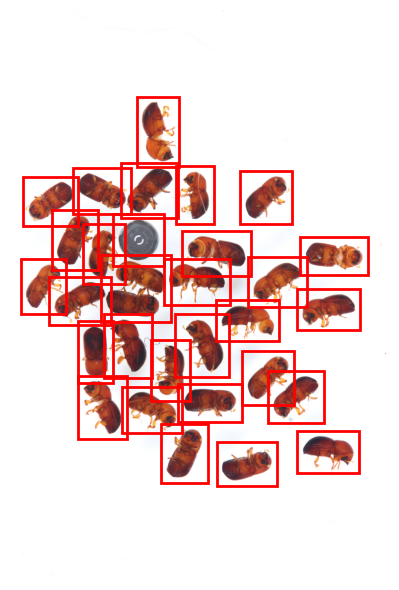

In [10]:
# plot boxes that will be used to extract 
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(ppi.image)
coord_df = ppi.image_selected_df
for i in range(len(coord_df)):
    data_i = coord_df.iloc[i]
    minr = data_i['bbox-0']
    minc = data_i['bbox-1']
    maxr = data_i['bbox-2']
    maxc =data_i['bbox-3']
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [11]:
ppi.image_selected_df

centroid-0   centroid-1  bbox-0  bbox-1  bbox-2  bbox-3  orientation  \
0   1120.752660  1324.193304     788    1150    1426    1539     0.204718   
1   1632.879364  1264.386664    1390    1012    1889    1528    -0.776830   
2   1679.763630  1703.288776    1422    1508    1950    1859     0.119130   
3   1647.667871   833.969835    1435     576    1854    1102     1.107584   
4   1697.026465  2321.691380    1463    2093    1946    2565    -0.805892   
5   1736.719696   373.215508    1515     122    1960     621    -0.969263   
6   2092.295591   579.779726    1817     378    2365     801    -0.397277   
7   2094.729658  1170.241004    1858     938    2326    1397    -0.272437   
8   2219.413791   832.515599    1950     665    2491    1043    -0.119391   
9   2195.161087  1886.576704    2008    1568    2417    2192     1.352914   
10  2233.763270  2935.443870    2066    2641    2410    3252     1.486107   
11  2551.131876  1151.392743    2232     824    2840    1466    -0.600243   
12  2461.203384  2420.356032    2250    2166    2697    2703    -0.981671   
13  2432.834449  1697.158498    2260    1397    2680    2004     1.493324   
14  2500.859616   288.650691    2266      96    2760     507    -0.573749   
15  2627.133173   628.283460    2425     355    2863     920    -1.119055   
16  2708.707187  2887.675036    2536    2611    2911    3187    -1.342377   
17  2803.717204  2173.330247    2641    1875    3008    2450     1.400013   
18  3041.847923  1090.302803    2764     856    3342    1291     0.367359   
19  3042.048538  1781.669609    2768    1499    3339    1990     0.459911   
20  3109.202209   778.648252    2829     617    3394     940     0.067232   
21  3282.522950  1476.832507    2997    1281    3551    1636    -0.104730   
22  3337.307842  2339.798553    3102    2113    3588    2581    -0.776505   
23  3502.159570  2587.918944    3282    2346    3756    2855    -0.864526   
24  3597.950608   861.568114    3324     618    3905    1063     0.447672   
25  3555.371086  1814.439489    3397    1528    3748    2106    -1.569550   
26  3618.161220  1300.321792    3424    1016    3848    1564     1.125610   
27  4036.357749  1588.944928    3763    1375    4301    1796    -0.433127   
28  3993.071229  2904.229603    3825    2614    4212    3176     1.380989   
29  4145.961841  2151.770660    3927    1878    4328    2430    -1.308230   

    axis_major_length  axis_minor_length    area  area_filled  kmeans_label  
0          595.526855         212.373456   87960        88145             1  
1          509.536593         237.666785   89310        89914             1  
2          448.591263         195.563574   64306        64450             1  
3          482.013335         223.340991   83308        83382             1  
4          477.187286         217.759037   76706        77049             1  
5          470.424270         215.481011   77844        78187             1  
6          486.027512         230.113836   85094        85304             1  
7          364.780036         354.785701   97347        99516             1  
8          451.668146         224.363832   72539        72573             1  
9          567.666352         230.136909   96755        97465             1  
10         551.828730         218.051830   85097        88360             1  
11         572.593257         497.089648  178198       189791             1  
12         500.073566         211.157870   79549        80579             1  
13         551.854170         230.363167   86777        88900             1  
14         450.734512         188.611530   63889        63922             1  
15         502.131224         226.802679   83786        84257             1  
16         519.036982         209.646704   80775        80824             1  
17         514.920786         221.569790   75489        75546             1  
18         506.984088         255.376842   91013        91112             1  
19         516.769501         235.712408   88014        8

All images printed (30)
All images printed (30)


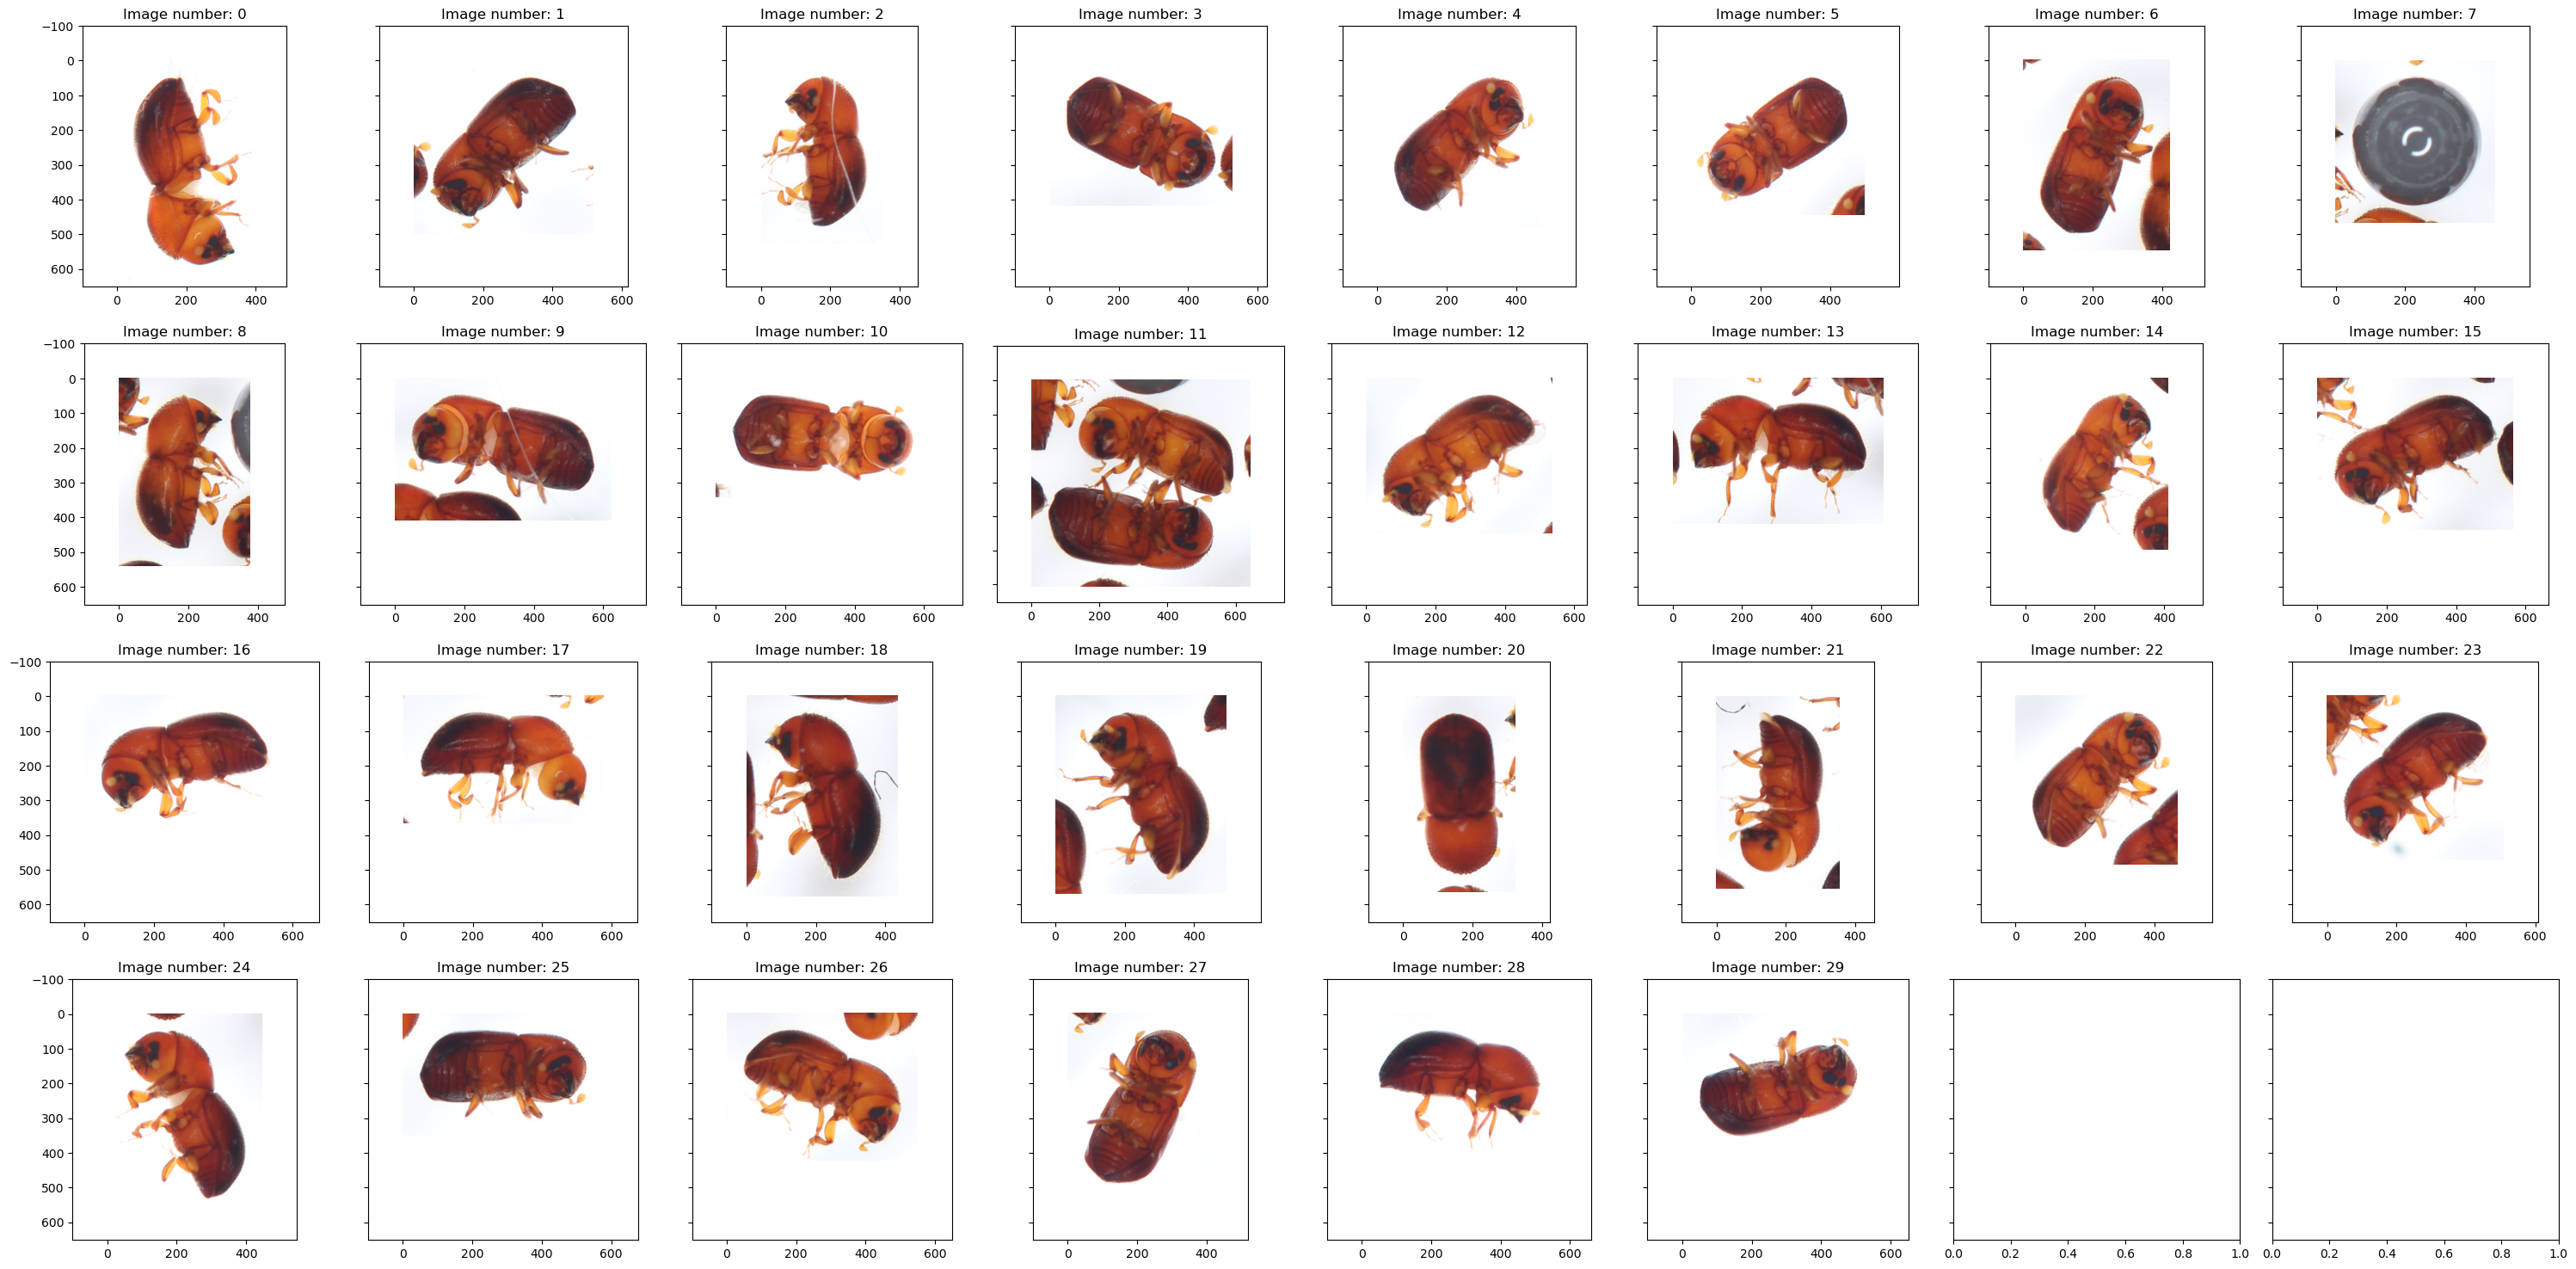

In [12]:
# define list of images
img_lst = ppi.col_image_lst

# plot pixel distribution values for all images in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
fig.set_figheight(15)
l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = axes[i][j].imshow(img_lst[l])
            axes[i][j].set_ylim(img_lst[l].shape[0]+ppi.image_edge_buffer*5, 0-ppi.image_edge_buffer*2)
            axes[i][j].set_xlim(0-ppi.image_edge_buffer*2, img_lst[l].shape[1]+ppi.image_edge_buffer*2)
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()

# Detect the outlier segment (ball bearing) from the compound image

In [13]:
# detect outlier 
ppi.detect_outlier()

In [ ]:
# plot pixel distribution values for all iamges in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
fig.suptitle('RGB distribution per image')

# initialize lists to store data in
r_ar_lst = ppi.r_ar_lst
g_ar_lst = ppi.g_ar_lst
b_ar_lst = ppi.b_ar_lst
all_ar_lst = ppi.all_ar_lst

l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = sns.kdeplot(ax=axes[i][j], data=r_ar_lst[l], color='lightcoral', fill=True, alpha=.5, linewidth=0)
            fig = sns.kdeplot(ax=axes[i][j], data=g_ar_lst[l], color='limegreen', fill=True, alpha=.5, linewidth=0)
            fig = sns.kdeplot(ax=axes[i][j], data=b_ar_lst[l], color='deepskyblue', fill=True, alpha=.5, linewidth=0)
            fig = sns.kdeplot(ax=axes[i][j], data=all_ar_lst[l], color='black', fill=False, alpha=.5, linewidth=1, linestyle='--')
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()
# fig.figure.savefig("Image_RGB_density_distribution.png")

In [ ]:
# Spearman correlation heatmap
corr_df = ppi.corr_coef
plt.figure(figsize=(20,20))
sns.heatmap(corr_df, annot=True, cmap=sns.diverging_palette(20, 220, as_cmap=True))
plt.show()

In [ ]:
# plot boxplot of summmed correlation
plt.figure(figsize=(20, 5))
sns.boxplot(x=ppi.corr_coef_sum, color='skyblue')
# sns.violinplot(x=ppi.corr_coef_sum, inner="stick", color='skyblue')
plt.show()

# Estimate size

In [ ]:
ppi.estimate_size(outlier_bw_image=ppi.outlier_bw_image, 
                          outlier_idx=ppi.outlier_idx, 
                          known_radius=1, 
                          canny_sigma=5)

In [ ]:
# print image detected as the outlier
io.imshow(ppi.outlier_bw_image)
plt.show()

In [ ]:
# print image detected as the outlier
bw_img = np.copy(ppi.inv_bw_image_lst[ppi.outlier_idx])
io.imshow(bw_img)
plt.show()

In [ ]:
# print image detected as the outlier
io.imshow(ppi.clean_inv_bw_image_lst[ppi.outlier_idx])
plt.show()

In [ ]:
# define list of images
img_lst = ppi.inv_bw_image_lst

# plot pixel distribution values for all iamges in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = axes[i][j].imshow(np.invert(img_lst[l]), cmap='Greys')
            axes[i][j].set_ylim(img_lst[l].shape[0]+ppi.image_edge_buffer*5, 0-ppi.image_edge_buffer*2)
            axes[i][j].set_xlim(0-ppi.image_edge_buffer*2, img_lst[l].shape[1]+ppi.image_edge_buffer*2)
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()

In [ ]:
# define list of images
img_lst = ppi.clean_inv_bw_image_lst

# plot pixel distribution values for all iamges in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = axes[i][j].imshow(np.invert(img_lst[l]), cmap='Greys')
            axes[i][j].set_ylim(img_lst[l].shape[0]+ppi.image_edge_buffer*5, 0-ppi.image_edge_buffer*2)
            axes[i][j].set_xlim(0-ppi.image_edge_buffer*2, img_lst[l].shape[1]+ppi.image_edge_buffer*2)
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()

In [ ]:
ppi.image_selected_df